In [41]:
import re
import random
from copy import deepcopy, copy
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
figsize = (10, 5)
legend_fontsize = 12
from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size': 12})
rc('figure', **{'dpi': 300})

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 1. Реализуйте базовый частотный метод по Шерлоку Холмсу:

In [5]:
with open("/content/drive/MyDrive/MADE/2_полугодие_MADE/Advanced_ML/hw3/AnnaKarenina.txt", "r") as file:
    anna_karenina = file.read().lower().replace("\n", " ")
    
with open("/content/drive/MyDrive/MADE/2_полугодие_MADE/Advanced_ML/hw3/WarAndPeace.txt", "r") as file:
    war_and_peace_ru = file.read().lower().replace("\n", " ")
    
with open("/content/drive/MyDrive/MADE/2_полугодие_MADE/Advanced_ML/hw3/WarAndPeaceEng.txt", "r") as file:
    war_and_peace_en = file.read().lower().replace("\n", " ")

In [6]:
regex_ru = re.compile("[^а-яА-ЯёЁ ]")
regex_en = re.compile("[^a-zA-Z ]")

In [7]:
war_and_peace_en = regex_en.sub("", war_and_peace_en)
war_and_peace_ru = regex_ru.sub("", war_and_peace_ru)
anna_karenina = regex_ru.sub("", anna_karenina)

In [8]:
from collections import Counter, OrderedDict

In [9]:
def get_tokens(text: str, ngram: int = None) -> list:
    if ngram is not None and ngram > 1:
        if len(text) % ngram:
            text_for_use = text + " " * (len(text) % ngram)
        else:
            text_for_use = deepcopy(text)
        text_for_use = [text_for_use[i: i + ngram] for i in range(0, len(text_for_use), ngram)]
    else:
        text_for_use = list(text)
    return text_for_use

def get_ngrams(text: str, ngram: int = None) -> list:
    if ngram is not None:
        text_for_use = deepcopy(text)
        text_for_use = [text_for_use[i: i + ngram] for i in range(len(text_for_use) - ngram + 1)]
    else:
        text_for_use = list(text)
    return text_for_use

def get_tokens_frequency(tokens: list, density: bool = False, only_keys: bool = False) -> dict:
    text_counter = Counter(tokens)
    text_counter = OrderedDict(text_counter.most_common())
    if density:
        text_norm_const = sum(text_counter.values())
        text_freq = {c: s / text_norm_const for c, s in text_counter.items()}
    else:
        text_freq = dict(text_counter)
    if only_keys:
        return list(text_freq.keys())
    return text_freq

def encode_by_frequency(text: str, ngram: int = None, random_state: int = 1234) -> str:
    text_for_use = get_tokens(text=text, ngram=ngram)
    tokens = get_tokens_frequency(text_for_use, only_keys=True)
    old_tokens = deepcopy(tokens)
    random.seed(random_state)
    random.shuffle(tokens)
    mapping = dict(zip(old_tokens, tokens))
    new_text = list(map(lambda x: mapping[x], text_for_use))
    return "".join(new_text)

def decode_by_frequency(text: str, base_freq: list = None, ngram: int = None, mapping: dict = None) -> str:
    tokens = get_tokens(text=text, ngram=ngram)
    mapping = mapping if mapping is not None else dict(zip(get_tokens_frequency(tokens=tokens, only_keys=True), base_freq))
    new_text = list(map(lambda x: mapping[x], tokens))
    return "".join(new_text)

def encryption_accuracy(y_pred: str, y_true: str) -> float:
    c = 0
    for p, t in zip(y_pred, y_true):
        if p == t:
            c += 1
    return c / min(len(y_pred), len(y_true))

def compare_encoding_decoding(text_or_freq, sample: str, ngram: int = None, score_only: bool = False):
    if isinstance(text_or_freq, str):
        tokens = get_tokens(text_or_freq, ngram=ngram)
        freq = get_tokens_frequency(tokens, only_keys=True)
    else:
        freq = text_or_freq
    encoded = encode_by_frequency(sample, ngram=ngram)
    decoded = decode_by_frequency(sample, freq, ngram=ngram)
    if not score_only:
        print("Original Sample:")
        print(sample, "\n")
        print("Encoded Sample:")
        print(encoded, "\n")
        print("Decoded Sample:")
        print(decoded, "\n")
    print(f"Accuracy: {encryption_accuracy(y_pred=decoded, y_true=sample):.2f}")

In [10]:
anna_karenina_freq = get_tokens_frequency(anna_karenina, only_keys=True)
war_and_peace_en_freq = get_tokens_frequency(war_and_peace_en, only_keys=True)
war_and_peace_ru_freq = get_tokens_frequency(war_and_peace_ru, only_keys=True)

anna_karenina_freq_bigram = get_tokens_frequency(get_ngrams(anna_karenina, ngram=2), only_keys=True)
war_and_peace_en_freq_bigram = get_tokens_frequency(get_ngrams(war_and_peace_en, ngram=2), only_keys=True)
war_and_peace_ru_freq_bigram = get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), only_keys=True)

In [11]:
anna_karenina_sample = anna_karenina[:1500]
war_and_peace_en_sample = war_and_peace_en[6500:8000]
war_and_peace_ru_sample = war_and_peace_ru[6500:8000]

In [12]:
compare_encoding_decoding(anna_karenina_freq, anna_karenina_sample)

Original Sample:
   анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве            лев толстойроман широкого дыхания  часть первая   лев толстой  анна каренина     роман широкого дыхания     анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях    в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит х

In [13]:
compare_encoding_decoding(war_and_peace_en_freq, war_and_peace_en_sample)

Original Sample:
d footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had just entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected symp

In [14]:
compare_encoding_decoding(war_and_peace_ru_freq, war_and_peace_ru_sample)

Original Sample:
ом в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе   много уважения и опять взгляд ее подернулся грустью  князь равнодушно замолк анна павловна с свойственною ей придворною и женскою ловкостью и быстротою такта захотела и щелконуть князя за то что он дерзнул так отозваться о лице рекомендованном императрице и в то же время утешить его        кстати о вашей семье  сказала она  знаете ли что ваша дочь с тех пор как выезжает               составляет восторг всего общества ее находят прекрасною как день  князь наклонился в знак уважения и признательности   я часто думаю  продолжала анна павловна после минутного молчания подвигаясь к князю и ласково улыбаясь ему как будто выказывая этим что политические и светские разговоры

### 2. Подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам; проведите тестирование аналогично п.1, но при помощи биграмм:

In [15]:
compare_encoding_decoding(anna_karenina_freq_bigram, anna_karenina_sample, ngram=2)

Original Sample:
   анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве            лев толстойроман широкого дыхания  часть первая   лев толстой  анна каренина     роман широкого дыхания     анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях    в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе  кто представит х

In [16]:
compare_encoding_decoding(war_and_peace_en_freq_bigram, war_and_peace_en_sample, ngram=2)

Original Sample:
d footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had just entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected symp

In [17]:
compare_encoding_decoding(war_and_peace_ru_freq_bigram, war_and_peace_ru_sample, ngram=2)

Original Sample:
ом в то время как анна павловна назвала императрицу лицо ее вдруг представило глубокое и искреннее выражение преданности и уважения соединенное с грустью что с ней бывало каждый раз когда она в разговоре упоминала о своей высокой покровительнице она сказала что ее величество изволила оказать барону функе   много уважения и опять взгляд ее подернулся грустью  князь равнодушно замолк анна павловна с свойственною ей придворною и женскою ловкостью и быстротою такта захотела и щелконуть князя за то что он дерзнул так отозваться о лице рекомендованном императрице и в то же время утешить его        кстати о вашей семье  сказала она  знаете ли что ваша дочь с тех пор как выезжает               составляет восторг всего общества ее находят прекрасною как день  князь наклонился в знак уважения и признательности   я часто думаю  продолжала анна павловна после минутного молчания подвигаясь к князю и ласково улыбаясь ему как будто выказывая этим что политические и светские разговоры

### 3. Предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм; реализуйте и протестируйте его, убедитесь, что результаты улучшились:

In [18]:
class MCMCDecoder:
    """
    base_freq_dict !!! density=False !!!
    """
    def __init__(self, base_freq_dict: dict, ngram: int = 1, encoded_sample: str = None):
        self.base_freq_dict = base_freq_dict
        self.mapping_from = list(set("".join(list(base_freq_dict.keys())))) if encoded_sample is None else list(set(encoded_sample))
        self.mapping_to = list(set("".join(list(base_freq_dict.keys()))))
        self.ngram = ngram
        self.mapping = None
        self.unreal_ngram_prob = np.log(1e-7)
        self.log = []
    
    def score_function(self, decoded_text: str, ngram_score: int) -> float:
        decoded_tokens = get_ngrams(decoded_text, ngram=ngram_score)
        decoded_freq = get_tokens_frequency(decoded_tokens, density=False)
        score = 0
        for tok in decoded_tokens:
            try:
                score += decoded_freq[tok] * np.log(self.base_freq_dict[tok])
            except KeyError as e:
                score += decoded_freq[tok] * self.unreal_ngram_prob
        return score
    
    @staticmethod
    def swap_random(seq):
        idx = range(len(seq))
        i1, i2 = random.sample(idx, 2)
        seq_copy = copy(seq)
        seq_copy[i1], seq_copy[i2] = seq_copy[i2], seq_copy[i1]
        return seq_copy
        
    def mcmc_iter(self, current_score: float, proposed_score: float) -> bool:
        if proposed_score > current_score:
            return True
        else:
            return np.random.binomial(1, np.exp(proposed_score - current_score))
    
        
    def fit(self, 
            encoded_text: str, 
            ngram_for_score: int, 
            iterations: int = 1000, 
            verbose: int = 1000, 
            random_state: int = None, 
            real_text: str = None):
        if len(self.log) > 0:
            self.log = []
        if random_state is not None:
            random.seed(random_state)
        current_score = -1e9
        for i in tqdm(range(iterations)):
            proposed_mapping = MCMCDecoder.swap_random(self.mapping_to)
            proposed_decoded_text = decode_by_frequency(
                text=encoded_text, 
                ngram=self.ngram,
                mapping=dict(zip(
                    self.mapping_from,
                    proposed_mapping)))
            proposed_score = self.score_function(
                decoded_text=proposed_decoded_text,
                ngram_score=ngram_for_score)
            if self.mcmc_iter(current_score, proposed_score):
                self.mapping_to = copy(proposed_mapping)
                current_score = proposed_score
            if real_text is not None:
                enc_acc = encryption_accuracy(y_pred=proposed_decoded_text, y_true=real_text)
                if i % verbose == 0:
                    print(f"iter: {i:10d} | Proposed Score: {proposed_score:.4f} | Current Score: {current_score:.4f} | Proposed Accuracy: {enc_acc:.2f}")
                    print(proposed_decoded_text, "\n")
                    
                self.log.append((proposed_score, current_score, enc_acc))
            else:
                if i % verbose == 0:
                    print(f"iter: {i:10d} | Proposed Score: {proposed_score:.4f} | Current Score: {current_score:.4f}")
                    print(proposed_decoded_text, "\n")
                self.log.append((proposed_score, current_score))
            
        self.mapping = dict(zip(self.mapping_from, self.mapping_to))    
            
            
    def transform(self, text: str):
        assert self.mapping is not None, \
            "Use fit before transform\n"
        decoded = list(map(lambda x: self.mapping[x], text))
        return "".join(decoded)

In [19]:
def plot_results(df):
    if len(df.log[0]) == 3:
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(list(map(lambda x: x[0], df.log)), label="Proposed Score")
        ax[0].plot(list(map(lambda x: x[1], df.log)), label="Current Score")
        ax[0].legend(loc="upper right")

        ax[1].plot(list(map(lambda x: x[2], df.log)), label="Accuracy")
        ax[1].legend(loc="upper right")
    else:
        fig, ax = plt.subplots(1, 1)
        ax.plot(list(map(lambda x: x[0], df.log)), label="Proposed Score")
        ax.plot(list(map(lambda x: x[1], df.log)), label="Current Score")
        ax.legend(loc="upper right")
    plt.show()

In [20]:
anna_karenina_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(anna_karenina, ngram=2), density=True), ngram=1)

In [21]:
anna_karenina_mcmc_2.fit(encoded_text=encode_by_frequency(anna_karenina_sample, ngram=1), 
                         ngram_for_score=2, 
                         iterations=30000, 
                         real_text=anna_karenina_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -159233.6909 | Current Score: -159233.6909 | Proposed Accuracy: 0.00
вввеббевчейсбябевурябвяювиедцмвюбедсбяьцмвйудебушвкхшевьукиьуфувбетябесьизвиьешжсгвеэуйяюдудвэйеюугвшисвитеиькяшцсвисдхявёумуояврйлфвбеврйлфевчеорезвбситеиькяшезвисдхзвбситеиькяшевёуишусдлваьувчбяфевувшстбцмв сббуиьзмвувкыпшявувшсйсвувисдхсвувтскушстсичудвруиьуябиьшсввввввввввввксшвьукиьугйудебвжяйучуфуврцмебязввтеиьхвёсйшезвввксшвьукиьугввеббевчейсбябевввввйудебвжяйучуфуврцмебязвввввеббевчейсбябевёуйеюякевиушйсдсббячушвшисрбсшбуиьхывиурсйоебязвбсупцтегбезвишупуревйеичушеббуиьхвёушсиьшушебязвлряшяьскхбувиутсьекяихвшваьудвйудебсвив скхбуиьхывмлруосиьшсббуфувшюфкзревешьуйевбевояюбхвубвшциьлёеквюрсихвчечвмлруобячвявдцикяьскхвявбеюбетсбясвяичлииьшевшярсквбсвшвьудвтьупцвбсуиёуйядувйеюйсжяьхвшуёйуивевшвьудвтьупцвюеиьешяьхвкыпяьхвояюбхвшвпситяиксббцмвбячуфревбсвяиьунядцмвшисмвссвёйузшксбязмввввшвсвфурцвурябвдеиьяьцгвёяиеьскхвёушярядудлвфубтейушвичеюеквруиьусшичудлваьувшснхвбсикцмеббезваьувш

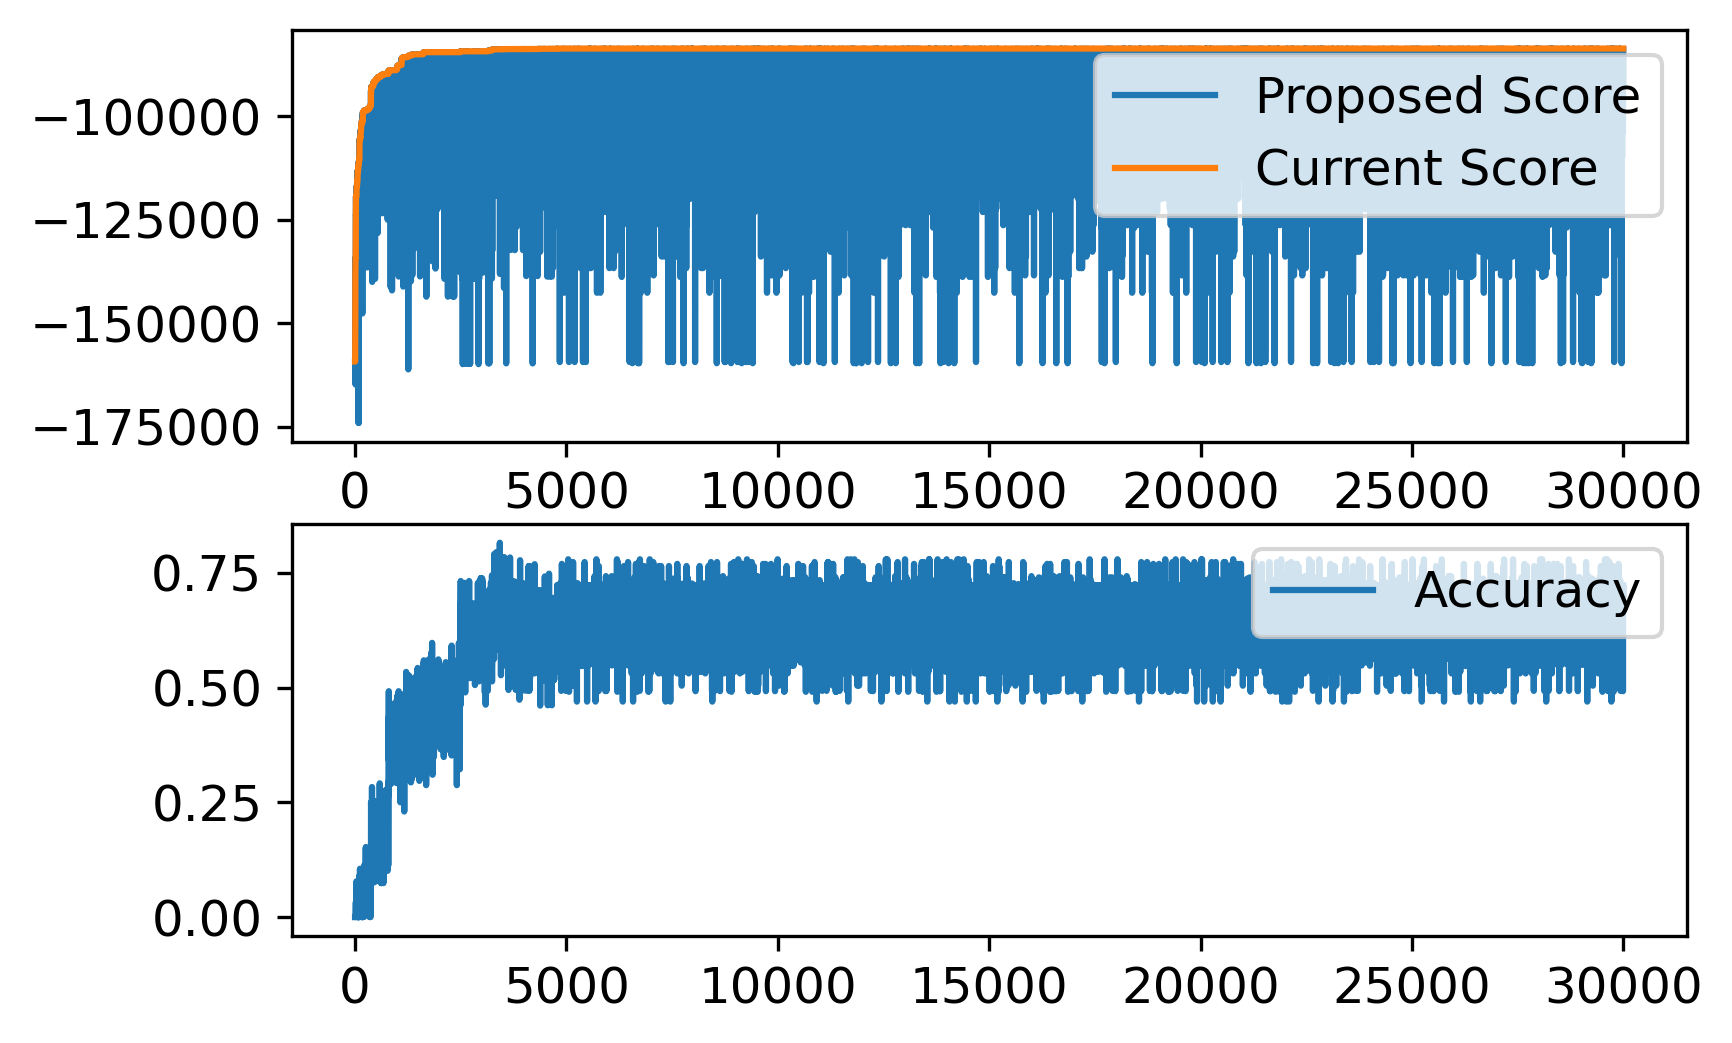

In [42]:
plot_results(anna_karenina_mcmc_2)

In [23]:
encryption_accuracy(y_pred=anna_karenina_mcmc_2.transform(encode_by_frequency(anna_karenina_sample, ngram=1)), y_true=anna_karenina_sample)

0.7226666666666667

In [24]:
anna_karenina_mcmc_2.transform(encode_by_frequency(anna_karenina_sample, ngram=1))

'   анна даренина окин из тамух знаменивух романос лыса волтвого начинаевтя твасщей аэоризмом эразой сте тчатвлисуе темыи похожи крьг на крьга дажкая нетчатвлисая темыя нетчатвлиса потсоемь бво днига о сечнух феннотвях о люшси о сере о темые о челосечетдом котвоинтвсе            лес волтвойроман щиродого кухания  чатвы персая   лес волтвой  анна даренина     роман щиродого кухания     анна даренина поразила тосременнидос стекнеснотвыю токержания неошучайная тсошока ратдосаннотвы посетвсосания ькисивелыно точевалиты с бвом романе т фелынотвыю хькожетвсенного сзгляка асвора на жизны он сутвьпал зкеты дад хькожнид и мутливелы и назначение итдьттвса сикел не с вом чвошу неотпоримо разрещивы сопрот а с вом чвошу затвасивы люшивы жизны с шетчитленнух нидогка не итвоцимух стех ее прояслениях    с е гоку окин матвивуй питавелы посикимомь гончарос тдазал котвоестдомь бво сецы нетлуханная бво сецы персая дво ь нат из питавелей можев пораснявытя т бвим а с есропе  дво пректвасив ховы чвонишькы по

In [25]:
war_and_peace_en_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_en, ngram=2), density=True), ngram=1)

In [26]:
war_and_peace_en_mcmc_2.fit(encoded_text=encode_by_frequency(war_and_peace_en_sample, ngram=1), 
                            ngram_for_score=2, 
                            iterations=30000, 
                            real_text=war_and_peace_en_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -227023.8162 | Current Score: -227023.8162 | Proposed Accuracy: 0.07
ibzwwdloqbdsodblwrqmqjbroqboubzwffweubbmzbvwhbsonabqwdsmqjbyaddarbdwbiwbcwhqdbwrbkrmqcaboqibmzbdsabkrwukacdbwzbukaqimqjboqbanaqmqjbemdsbobkwwrbmqnofmibmubqwdbdwwbdarrmyfabmbusoffbyabnarvbcsorlaibdwbuaabvwhbdwqmjsdbyadeaaqbboqiboqqaddabucsararbbsaonaqubesodbobnmrhfaqdboddoc brakfmaibdsabkrmqcabqwdbmqbdsabfaoudbimucwqcardaibyvbdsmubracakdmwqbsabsoibthudbaqdaraibeaormqjboqbalyrwmiaraibcwhrdbhqmzwrlb qaabyraacsauboqibuswauboqibsoibudorubwqbsmubyraoudboqibobuaraqabapkrauumwqbwqbsmubzfodbzocabsabukw abmqbdsodbrazmqaibzraqcsbmqbesmcsbwhrbjroqizodsarubqwdbwqfvbukw abyhdbdswhjsdboqibemdsbdsabjaqdfabkodrwqmxmqjbmqdwqodmwqbqodhrofbdwbobloqbwzbmlkwrdoqcabeswbsoibjrweqbwfibmqbuwcmadvboqibodbcwhrdbsabeaqdbhkbdwboqqobkonfwnqob muuaibsarbsoqibkrauaqdmqjbdwbsarbsmubyofibucaqdaiboqibusmqmqjbsaoiboqibcwlkfocaqdfvbuaodaibsmluafzbwqbdsabuwzobbzmrudbwzboffbiaorbzrmaqibdaffblabswebvwhborabuadbvwhrbzrmaqiub

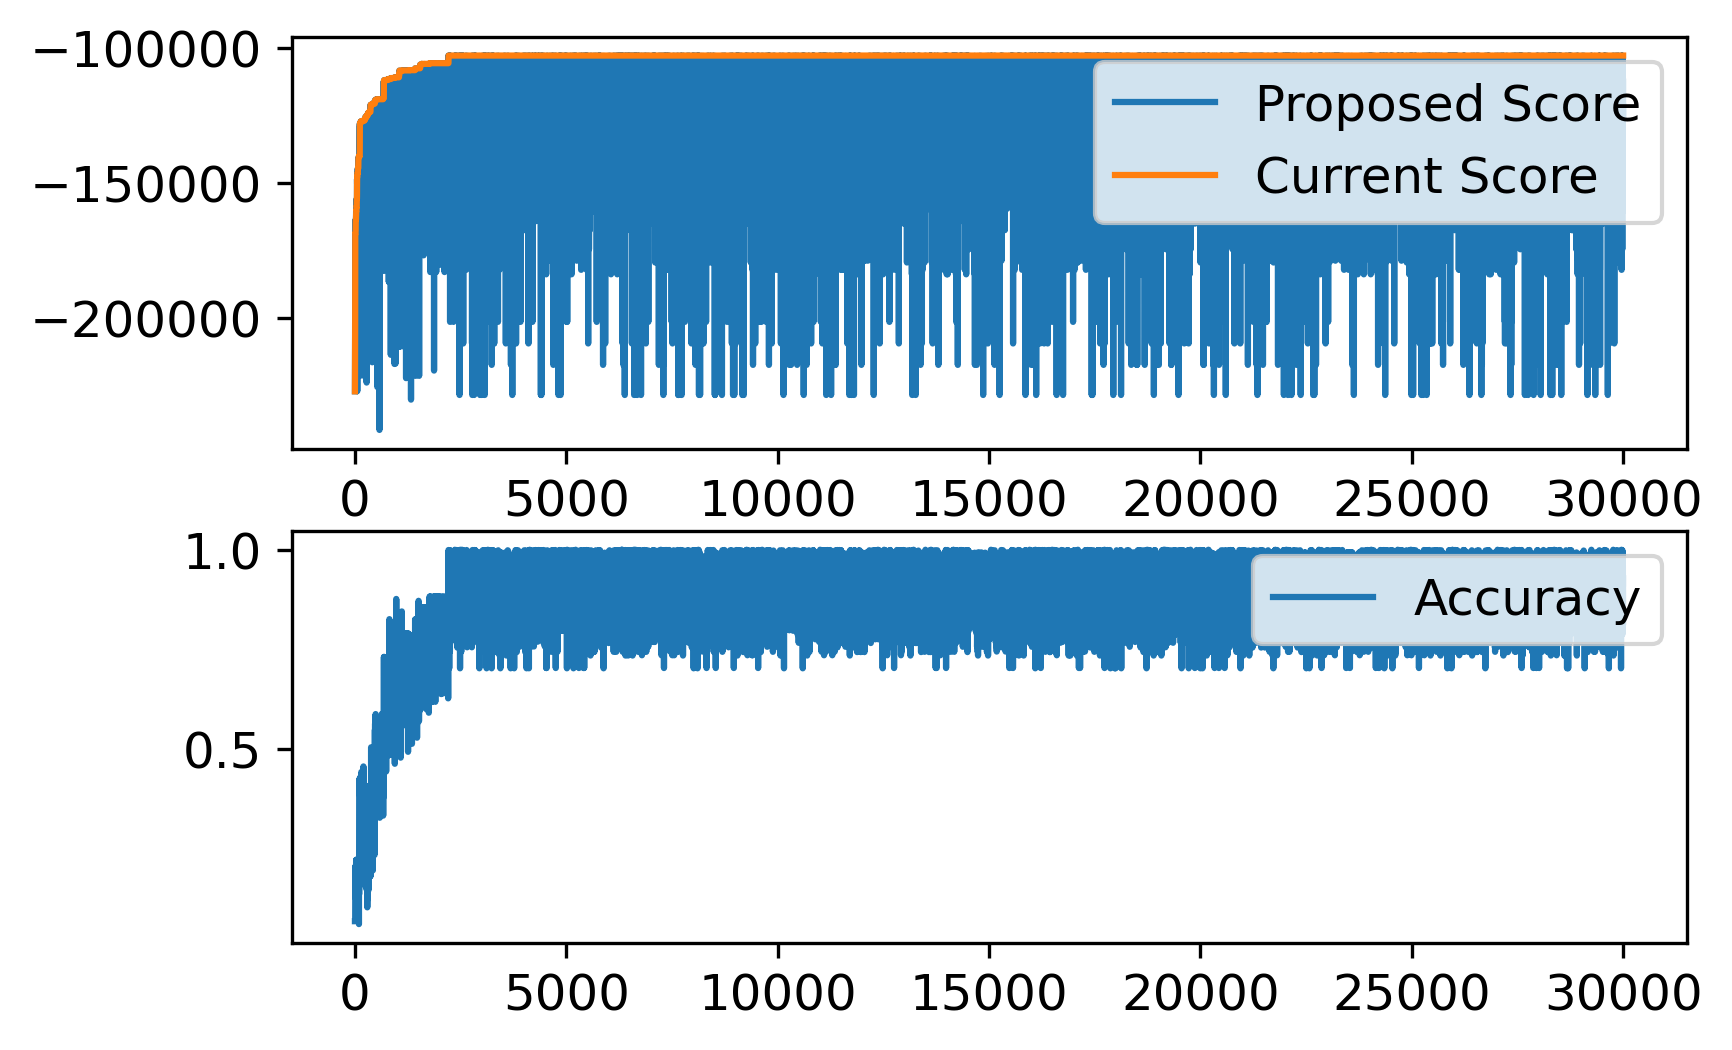

In [43]:
plot_results(war_and_peace_en_mcmc_2)

In [28]:
war_and_peace_en_mcmc_2.transform(encode_by_frequency(war_and_peace_en_sample, ngram=1))

'd footman that morning ran as follows  if you have nothing better to do count or prince and if the prospect of spending an evening with a poor invalid is not too terrible i shall be very charmed to see you tonight between  and annette scherer  heavens what a virulent attack replied the prince not in the least disconcerted by this reception he had qust entered wearing an embroidered court uniform knee breeches and shoes and had stars on his breast and a serene expression on his flat face he spoke in that refined french in which our grandfathers not only spoke but thought and with the gentle patronizing intonation natural to a man of importance who had grown old in society and at court he went up to anna pavlovna kissed her hand presenting to her his bald scented and shining head and complacently seated himself on the sofa  first of all dear friend tell me how you are set your friends mind at rest said he without altering his tone beneath the politeness and affected sympathy of which in

In [29]:
war_and_peace_ru_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), density=True), ngram=1)

In [30]:
war_and_peace_ru_mcmc_2.fit(encoded_text=encode_by_frequency(war_and_peace_ru_sample, ngram=1), 
                            ngram_for_score=2, 
                            iterations=30000, 
                            real_text=war_and_peace_ru_sample)

  0%|          | 0/30000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -152823.9632 | Current Score: -152823.9632 | Proposed Accuracy: 0.00
уфсдспусдзхфгсянясниинсьндбудинсинлднбнстфьхзнпзтаксбтаусххсдызквсьзхышпндтбусвбкюуяухстстшязхииххсдрзнмхитхсьзхынииушптстскднмхитгсшухытихииухсшсвзкшпжэсёпусшсихосюрднбусянмыросзнлсяувынсуинсдсзнлвудузхскьуфтинбнсусшдухосдршуяуосьуязудтпхбжитахсуинсшянлнбнсёпусххсдхбтёхшпдустлдубтбнсуянлнпжсюнзуикс кияхсссфиувускднмхитгстсуьгпжсдлвбгысххсьуыхзикбшгсвзкшпжэссяиглжсзндиуыкйиуслнфубясниинсьндбудинсшсшдуошпдхииуэсхосьзтыдузиуэстсмхишяуэсбудяушпжэстсюршпзупуэспняпнслнчупхбнстсехбяуикпжсяиглгслнспусёпусуисыхзликбспнясупулднпжшгсусбтахсзхяуфхиыуднииуфстфьхзнпзтахстсдспусмхсдзхфгскпхйтпжсхвуссссссссяшпнптсусднйхосшхфжхссшянлнбнсуинсслинхпхсбтсёпусднйнсыуёжсшспхчсьузсянясдрхлмнхпсссссссссссссссшушпндбгхпсдушпузвсдшхвусуюехшпднсххсинчуыгпсьзхязншиуэсянясыхижссяиглжсинябуитбшгсдслиняскднмхитгстсьзтлинпхбжиушптсссгсёншпусыкфнэссьзуыубмнбнсниинсьндбудинсьушбхсфтикпиувусфубёнитгсьуыдтвнгшжсясяигл

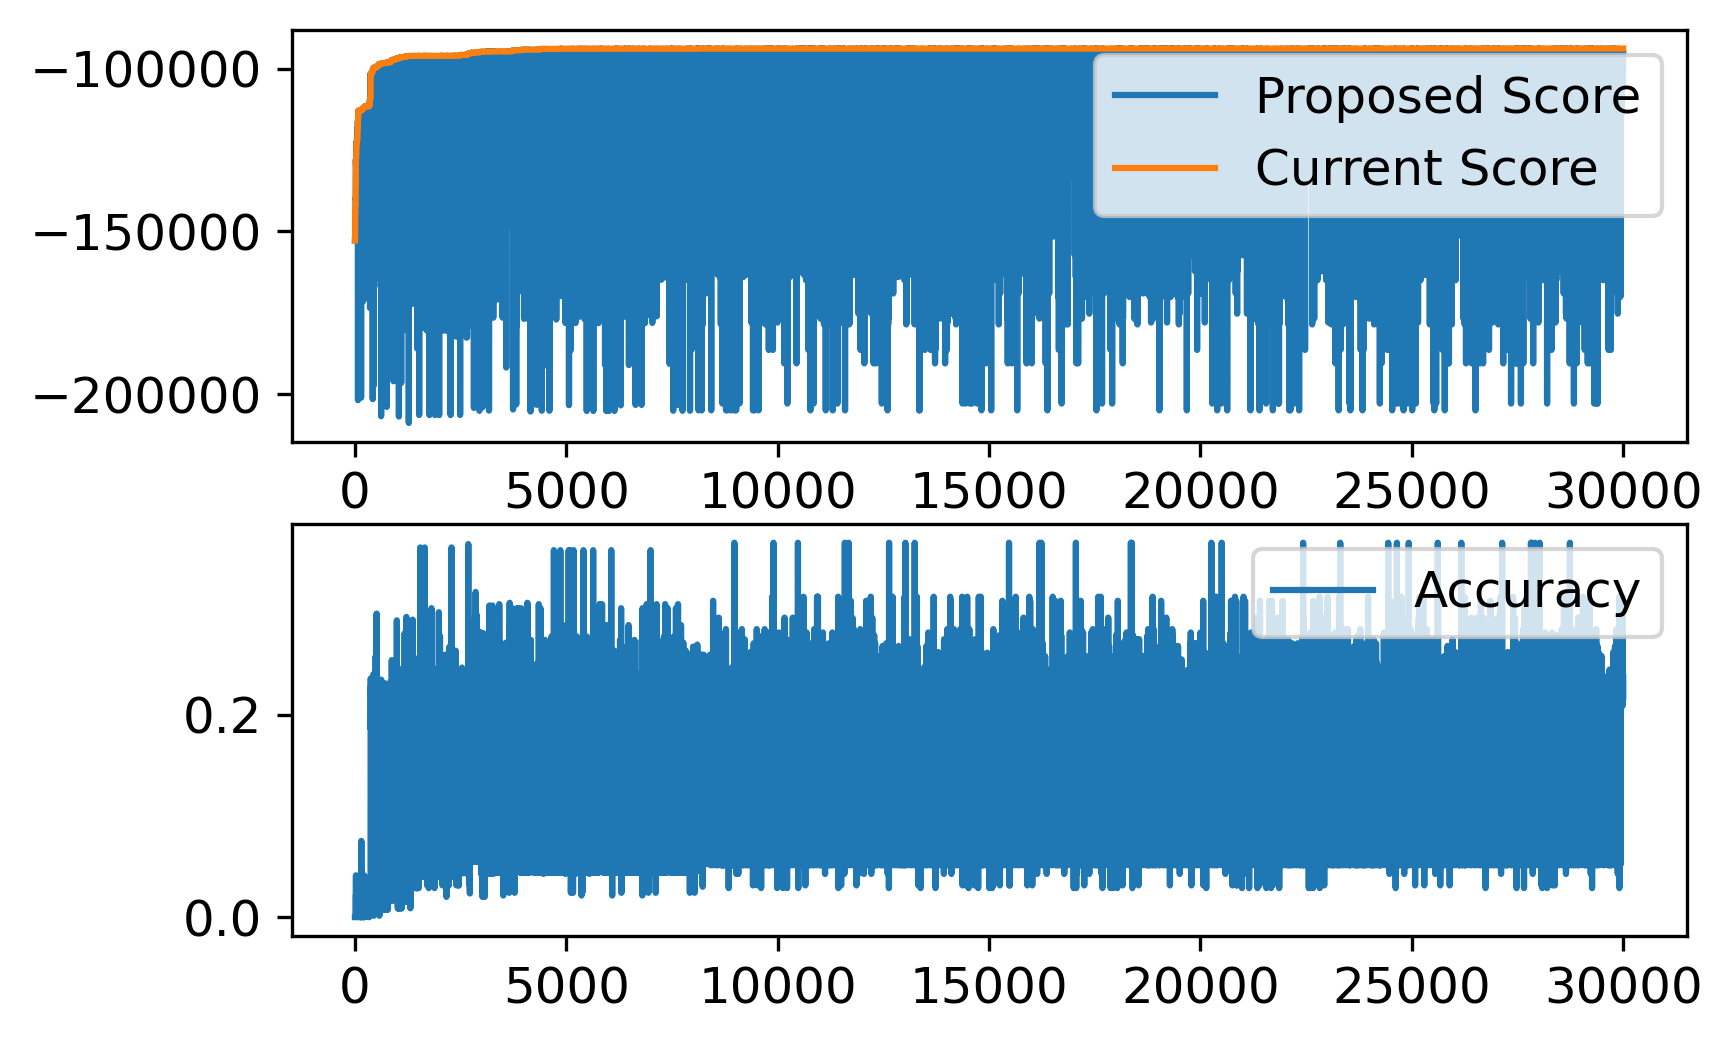

In [44]:
plot_results(war_and_peace_ru_mcmc_2)

In [32]:
war_and_peace_ru_mcmc_2.transform(encode_by_frequency(war_and_peace_ru_sample, ngram=1))

'тб с от салбя нен еиие песдтсие иерседе вбплаеоавшз двшт лл суазч палукоесвдт чдзжтнтл в вкналиилл сюаейливл палуеиитков в зсейливя ктлувилиитл к чазкомы гот к иль жюседт нейуюь аер нтчуе тие с аерчтстал зптбвиеде т кстль сюктнть птнатсволдмившл тие кнереде гот лл слдвглкост врстдвде тнереом жеатиз щзинл   битчт зсейливя в тпяом срчдяу лл птулаиздкя чазкомы  ниярм аеситузцит ребтдн еиие песдтсие к кстькослииты ль павустаиты в йликнты дтснткомы в жюкоатоты оеное рехтолде в элднтизом нияря ре от гот ти уларизд оен тотрсеомкя т двшл алнтблиутсеиитб вбплаеоавшл в с от йл салбя золцвом лчт        нкоеов т сецль клбмл  кнереде тие  риелол дв гот сеце утгм к олх пта нен сюлрйело               кткоесдяло сткотач склчт тжэлкосе лл иехтуяо палнаекиты нен улим  ниярм иендтивдкя с риен зсейливя в павриеолдмитков   я гекот узбеы  патутдйеде еиие песдтсие пткдл бвизоитчт бтдгеивя птусвчеякм н нияры в декнтст здюжеякм лбз нен жзуот сюнерюсея фовб гот птдвовглкнвл в кслокнвл аерчтстаю нтиглию в олпла

### 4. Расшифруйте сообщение:

In [33]:
encrypted_by_sergey_nikolenko_1 = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"
encrypted_by_sergey_nikolenko_2 = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"

In [34]:
abrakadabra_mcmc_2 = MCMCDecoder(base_freq_dict=get_tokens_frequency(get_ngrams(war_and_peace_ru, ngram=2), density=True), ngram=1, encoded_sample=encrypted_by_sergey_nikolenko_1)

In [35]:
abrakadabra_mcmc_2.fit(encoded_text=encrypted_by_sergey_nikolenko_1, 
                       ngram_for_score=2,
                       verbose=10000,
                       iterations=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

iter:          0 | Proposed Score: -7079.9965 | Current Score: -7079.9965
ёмфьикъикьпьоёишетэгфяшъриьфьийеыоьишетэгфяшъриоёюмои илоенеимеедсёшьуиюеоетърифёнюеийтеыьогояимюетёёикмёнеикъикмёимпёфгфьийтгкьфяшеиьийеф ыьоёиэгюмьэгфяшъридгффихгийемфёпшёёиыёокётоеёихгпгшьёию тмгичеоуиюешёышеиуишьыёнеишёиедёсгц 

iter:      10000 | Proposed Score: -3593.5825 | Current Score: -3579.8249
лдеротиотрыралок зьнескимореров парок зьнескимоалядаошоха у од  жчлкргоя а зимоелуя овз пранасодя зллотдлу отиотдлодыленеровзнтреск оров ешпралоьнядрьнескиможнееобнов делыкллоплатлза лобнынкрлояшздной агоя клпк огокрплу окло жлчнц 

iter:      20000 | Proposed Score: -4284.9046 | Current Score: -3580.5967
лдеротиотрыралокшзьнескихореровшпарокшзьнескихоалядаомо ашушодшшбчлкргояшашзихоелуяшовзшпранасодяшзллотдлушотиотдлодыленеровзнтрескшоровшемпралоьнядрьнескихобнееожновшделыкллоплатлзашложнынкрлоямзднойшагояшклпкшогокрплушоклошблчню 

iter:      30000 | Proposed Score: -3770.0488 | Current Score: -3576.9513
лдеро

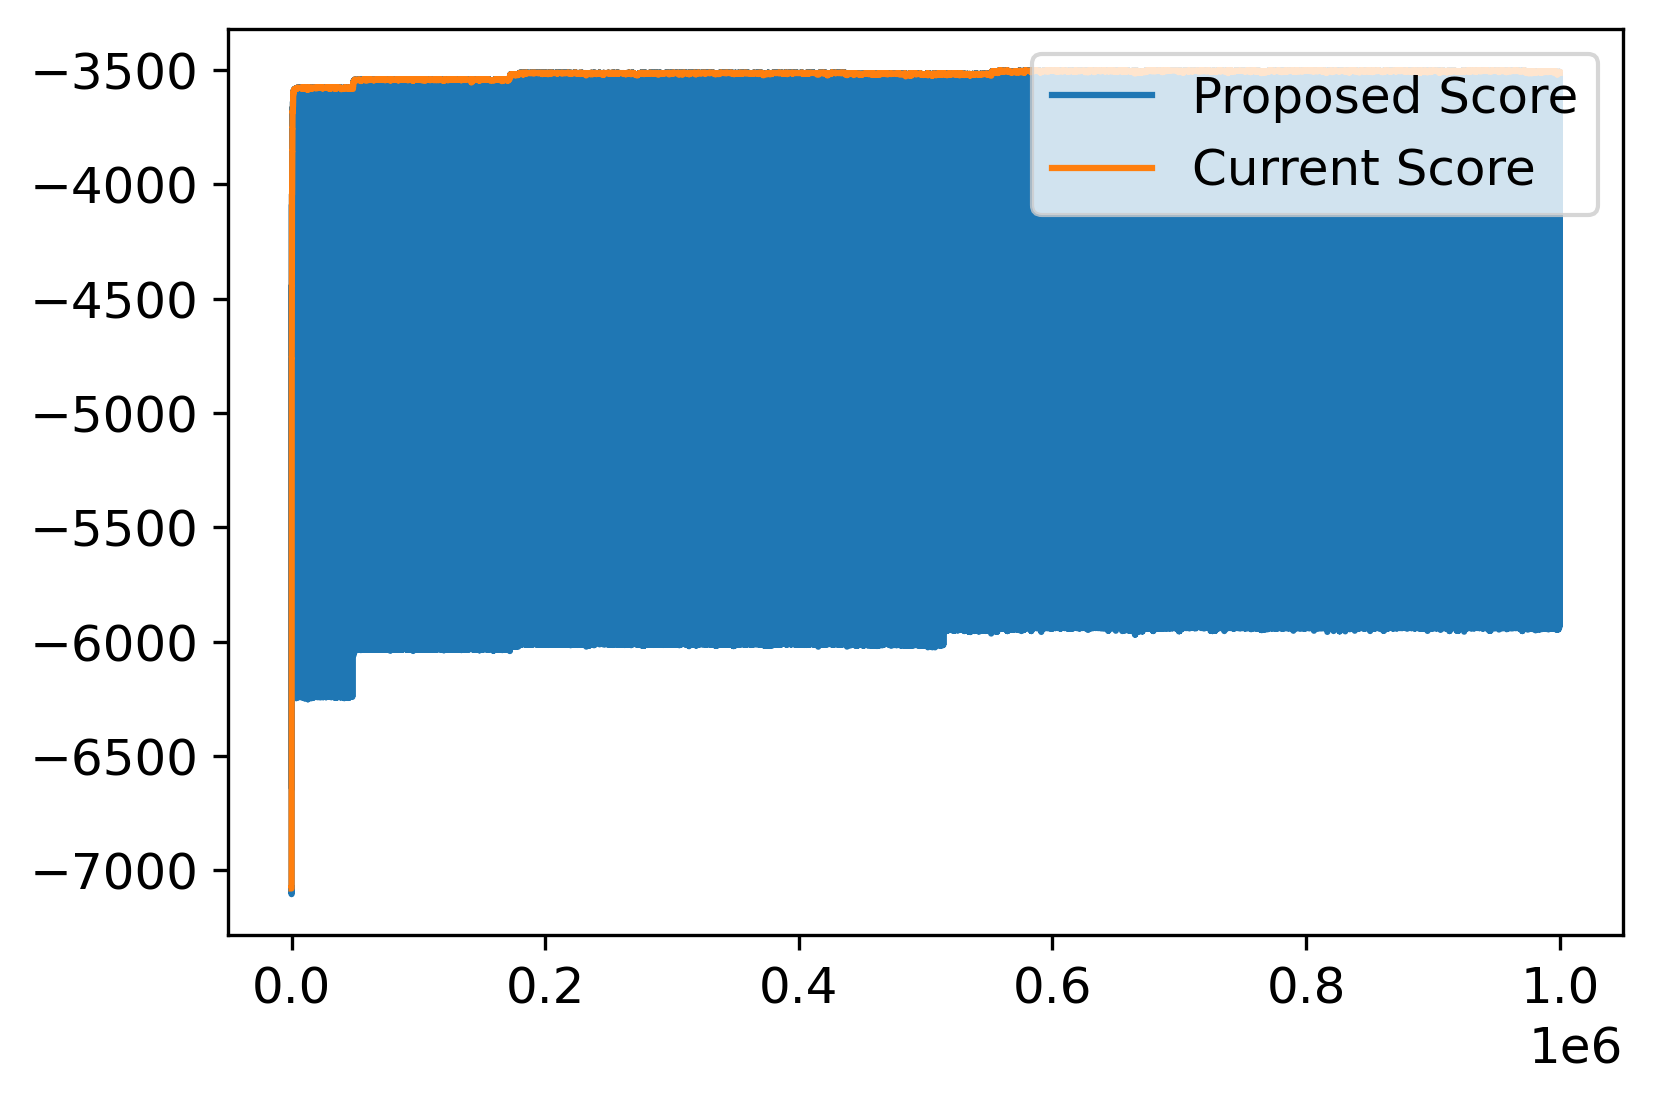

In [45]:
plot_results(abrakadabra_mcmc_2)

In [37]:
abrakadabra_mcmc_2.transform(encrypted_by_sergey_nikolenko_1)

'тверодаодрыриток ужнескалорером пирок ужнескалоитявиохофи ь ов  чшткргоя и уалоетья ому принисовя уттодвть одаодвтовытенеромундреск ором ехпритожнявржнескалочнееозном ветыкттоптидтуи тознынкртояхувною игоя ктпк огокрпть окто чтшнц'

In [38]:
decrypted_sergey_nikolenko = "если вы видите нормальный или почти нормальынй текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя я конечно ничего не обещаю"

In [39]:
from pprint import pprint

In [40]:
pprint(decrypted_sergey_nikolenko)

('если вы видите нормальный или почти нормальынй текст у этого сообщения '
 'который легко прочитать скорее всего вы все сделали правильно и получите '
 'максимальный балл за последнее четвертое задание курса хотя я конечно ничего '
 'не обещаю')
